# Hands on PyTorch

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

import PIL
from PIL import Image, ImageOps, ImageFilter

plt.ion()

In [2]:
!pip install fiftyone

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

training_size = 
validation_size = 
testing_size = 

In [5]:
#Dog's picture dataset

dataset_dog_train = foz.load_zoo_dataset(
    "open-images-v6", 
    "train", 
    label_types=["classifications"], 
    classes = ["Dog"],
    max_samples=training_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-dog-train",
)

dataset_dog_validation = foz.load_zoo_dataset(
    "open-images-v6", 
    "validation", 
    label_types=["classifications"], 
    classes = ["Dog"],
    max_samples=validation_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-dog-validation",
)

dataset_dog_test = foz.load_zoo_dataset(
    "open-images-v6", 
    "test", 
    label_types=["classifications"], 
    classes = ["Dog"],
    max_samples=testing_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-dog-test",
)

 100% |█████████████████| 372/372 [4.0m elapsed, 0s remaining, 2.3 samples/s]      
Found 372 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
All samples already downloaded
Found 64 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
 100% |███████████████████| 64/64 [37.5s elapsed, 0s remaining, 2.5 samples/s]      
Found 64 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [8]:
# Cat's pictures dataset

dataset_cat_train = foz.load_zoo_dataset(
    "open-images-v6", 
    "train", 
    label_types=["classifications"], 
    classes = ["Cat"],
    max_samples=training_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-cat-train",
)

dataset_cat_validation = foz.load_zoo_dataset(
    "open-images-v6", 
    "validation", 
    label_types=["classifications"], 
    classes = ["Cat"],
    max_samples=validation_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-cat-validation",
)

dataset_cat_test = foz.load_zoo_dataset(
    "open-images-v6", 
    "test", 
    label_types=["classifications"], 
    classes = ["Cat"],
    max_samples=testing_size,
    seed=51,
    shuffle=True,
    dataset_name="open-images-cat-test",
)

All samples already downloaded
Found 372 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
All samples already downloaded
Found 64 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
All samples already downloaded
Found 64 samples
Dataset info written to '/Users/martinvielvoye/fiftyone/open-images-v6/info.json'
Loading existing dataset 'open-images-cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [1]:
# Visualization avec l'application fiftyone


Export des variables en local

Exemple pour un dataset : 
```
path_to_export_dog = "./image_folder.heavy/dog"
label_field = "ground_truth"

dataset_dog.export(
    export_dir=path_to_export_dog, dataset_type=fo.types.ImageDirectory, label_field=label_field
)
```

In [2]:
# Export des variables en local
        

## Quick Data Import

In [13]:
# Créer une fonction pour importer les donnees avec PyTorch

def create_dataset(folder_name):


In [25]:
# Importation de la donnée


(<PIL.Image.Image image mode=RGB size=1024x768 at 0x10E743880>, 0)

In [61]:
# Fonction de visualisation des photos

def plot_cats_n_dogs(data, dataset_section = "train", flag = False):
    labels_map = {
        0: 'Cat',
        1: 'Dog'
    }
    
    data_var = data[dataset_section].dataset
    
    print(len(data_var))

    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data_var), size=(1,)).item()
        img, label = data_var[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        if flag : 
            plt.imshow(img, cmap="gray")
        else : 
            plt.imshow(img.permute(1, 2, 0))
    plt.show()
    
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

913


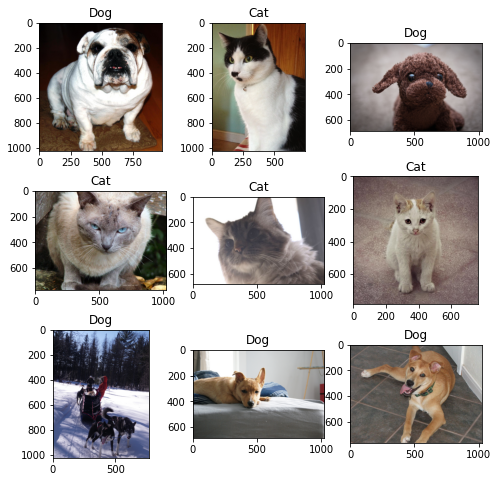

In [34]:
plot_cats_n_dogs(quick_dataset_torch, 'train', True)

## Data Manipulation

In [36]:
# Nouvelle fonction pour loader avec transformation
# https://pytorch.org/vision/stable/transforms.html


In [53]:
# import de la donnée avec transformation


In [3]:
# Visualisation des photos avec transformations


## Training Process

In [55]:
# Créer une fonction pour entrainer un modele de type CNN

def train_model():


In [56]:
# Créer une fonction pour visualiser certaines predictions d'un modele

def visualize_model():
   

## Transfer Learning

In [57]:
# Import d'un modèle CNN pré-entrainé 

from torchvision import models

model_ft = 

In [58]:
# Adapter le modèle existant a notre problème
# Taille des photos en input
# Nombre d'outputs finaux
# Notre propre optimizer et scheduler


In [4]:
# Entrainement de du modèle pré-entrainé
model_ft = 

SyntaxError: invalid syntax (<ipython-input-4-8d5a5acc5edb>, line 2)

In [5]:
# Visualisation de certaines prédictions
visualize_model(model_ft)

NameError: name 'visualize_model' is not defined

In [77]:
# Créer une fonction d'évaluation de perfomance de classification

def evaluate_test():


In [78]:
# Evaluation de notre modèle


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
Training complete in 2m 17s
Best validation Acc: 0.959474
